<a href="https://colab.research.google.com/github/jdpulgarine/Evaluacion2020-1/blob/master/JDP_Examen_2020_1_01_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Examen 15%

## Ejercicio 1
Encuentre las raices positivas de:
$$x^{2}-4 x \sin x+(2 \sin x)^{2}=0$$

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

In [0]:
#Función ejercicio

def f(x):
  y = x ** 2 -4 * x * np.sin(x) + (2 * np.sin (x)) ** 2
  return y

g = lambda x: x - f(x)

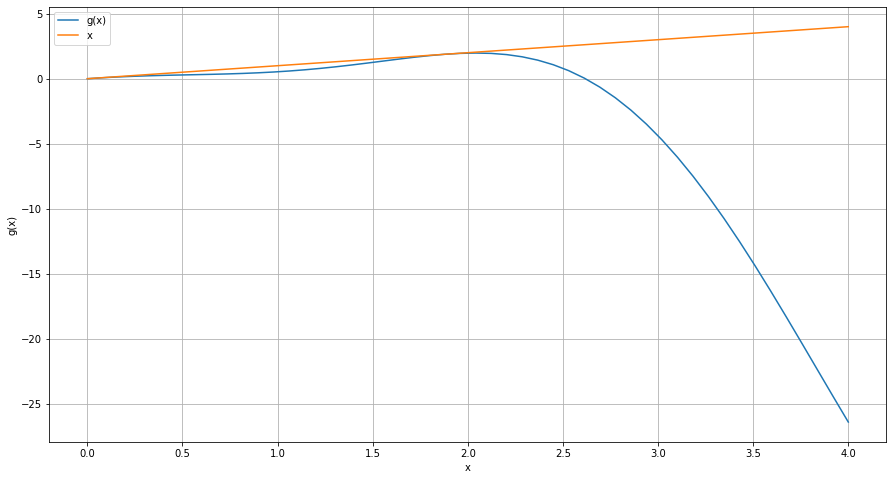

In [46]:
#Gráfica Función
x = np.linspace(0, 4)

plt.figure(figsize=(15,8))
plt.plot(x, g(x),label="g(x)")
plt.plot(x,x,label="x")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid()
plt.show()

In [48]:
# De la gráfica se puede percibir que existen raíces en el intervalo [0,4] (método Punto fijo)
root1 = optimize.fixed_point(g,0)
root2 = optimize.fixed_point(g,1.75)

# Prueba
prueba1 = f(root2)

print("La raíz positiva de la función es r = {} ya que al evaluarla en f(x) = 0. Efectivamente f(r)={}".format(root2,f(root2)))

La raíz positiva de la función es r = 1.8954927571107392 ya que al evaluarla en f(x) = 0. Efectivamente f(r)=6.1173288656846125e-12


In [51]:
#Otra forma de calcularlo utilizando el método de la secante
a=optimize.newton(f,1.75)
a

1.895494243190493

## Ejercicio 2
La rapidez $v$ de un cohete en un vuelo vertical cerca a la superficie de la tierra puede ser aproximada por 
$$
v=u \ln \frac{M_{0}}{M_{0}-\dot{m} t}-g t
$$
donde
* $u$ en $\mathrm{m} / \mathrm{s}=$, es la velocidad de expulsión del combustible relativa al cohete.
* $M_{0}$ en $\mathrm{kg}=$ es la masa del cohete al tiempo de despegue. 
* $\dot{m}$ en $\mathrm{kg} / \mathrm{s}=$ es la tasa consumo de combustible 
* $g=9.8 \mathrm{m} / \mathrm{s}^{2}$ es la aceleración gravitacional
* $t=$ en $s$, tiempo medido desde el despegue

Para los datos en: https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/rocket.json

1. Lea los datos en un `DataFrame` de `pandas` y verifique que $\dot{m}$ (`mdot`) es la única columna que está cambiando.
1. Agregue una columna al `DataFrame` con el tiempo que tarda el cohete para alcanzar la velocidad del sonido $(335 \mathrm{m} / \mathrm{s})$ para cada valor de $\dot{m}$
2. Gráfique dicho tiempo en función de $\dot{m}$ rotulando apropiadamente los ejes

In [156]:
# 1. leer datos

df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/rocket.json')
df

,M0,g,mdot,u
0,2800000,9.8,10000,2510
1,2800000,9.8,11000,2510
2,2800000,9.8,12000,2510
3,2800000,9.8,13000,2510
4,2800000,9.8,14000,2510
5,2800000,9.8,15000,2510


In [0]:
# 2. Cálculo de t para condiciones dadas

#Parametros iniciales

M0 = df.M0.max()
g = df.g.max()
u = df.u.max()

t = np.linspace(0,160)

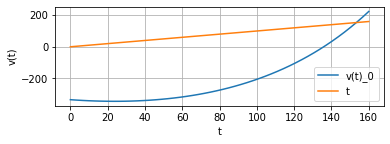

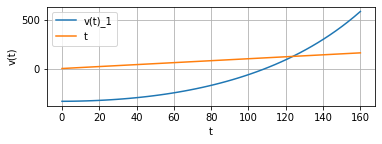

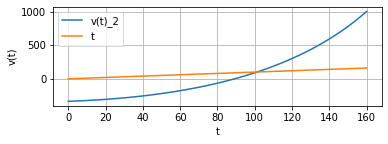

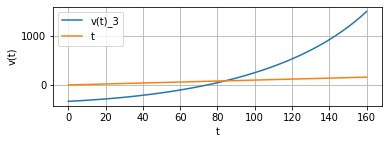

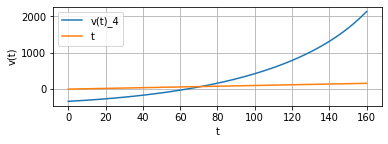

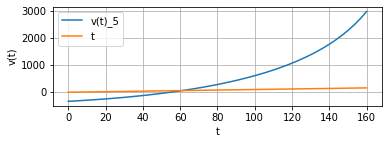

In [149]:
#Definición función de rapidez

def v1(t,m):
  y = u * np.log(M0 / (M0 - m * t)) - g * t -335
  return y

#Gráficas

for i in range(6):

  plt.figure(figsize=(20,4))
  plt.subplot(2,3,i+1)
  plt.plot(t, v1(t = t, m= df.iloc[i,2]),label="v(t)_"+str(i))
  plt.plot(t,t, label="t")
  plt.xlabel("t")
  plt.ylabel("v(t)")
  plt.legend()
  plt.grid()
  plt.show()

In [0]:
# Tiempo en alcanzar velocidad del sonido para cada mdot

b0 = optimize.newton(v1,150,args=(df.iloc[0,2],))
b1 = optimize.newton(v1,120,args=(df.iloc[1,2],))
b2 = optimize.newton(v1,100,args=(df.iloc[2,2],))
b3 = optimize.newton(v1,80,args=(df.iloc[3,2],))
b4 = optimize.newton(v1,80,args=(df.iloc[4,2],))
b5 = optimize.newton(v1,60,args=(df.iloc[5,2],))

In [0]:
t_v = [b0,b1,b2,b3,b4,b5]

In [0]:
#Añadir t_v a df
#siendo  t_s = t para alcanzar velocidad del sonido (s)
df['t_s'] = t_v

In [158]:
df

,M0,g,mdot,u,t_s
0,2800000,9.8,10000,2510,135.830647
1,2800000,9.8,11000,2510,109.017811
2,2800000,9.8,12000,2510,89.202572
3,2800000,9.8,13000,2510,74.455682
4,2800000,9.8,14000,2510,63.324893
5,2800000,9.8,15000,2510,54.770940


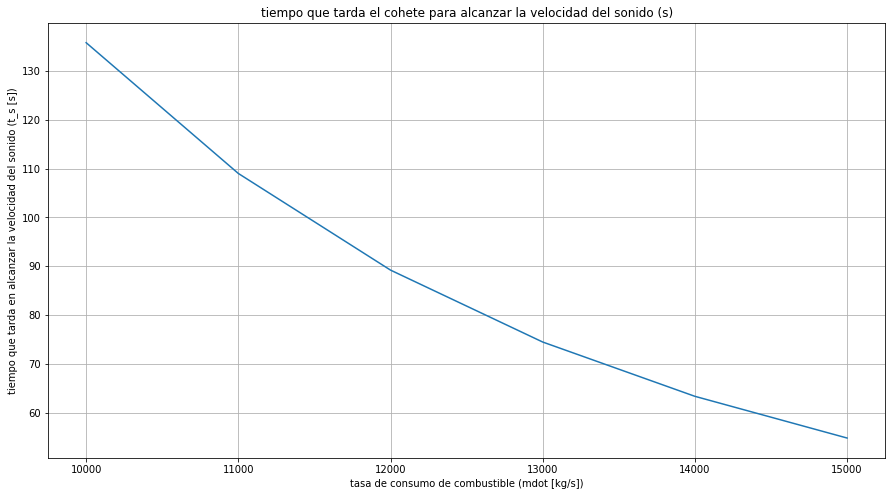

In [159]:
# 3. Gráfica

plt.figure(figsize=(15,8))
plt.plot(df.mdot,df.t_s)
plt.title("tiempo que tarda el cohete para alcanzar la velocidad del sonido (s)")
plt.xlabel("tasa de consumo de combustible (mdot [kg/s])")
plt.ylabel("tiempo que tarda en alcanzar la velocidad del sonido (t_s [s])")
plt.grid()
plt.show()